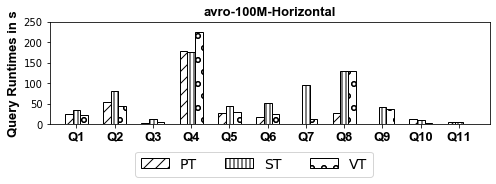

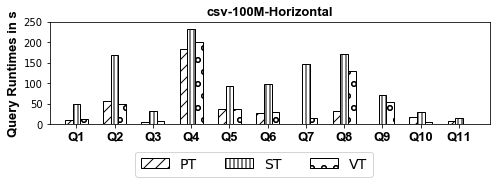

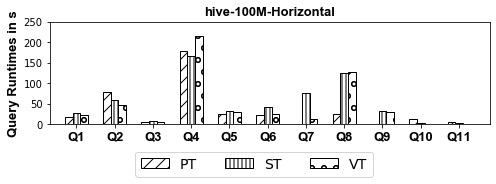

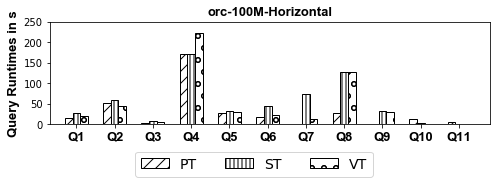

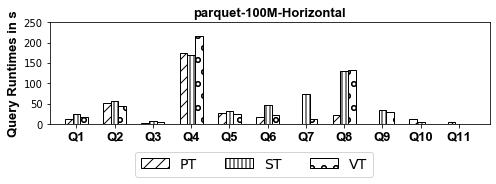

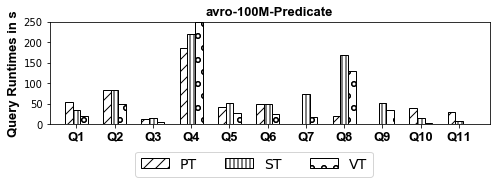

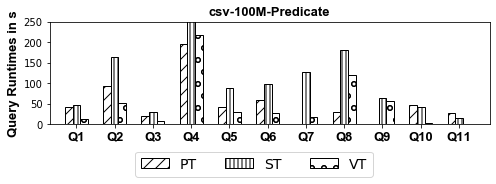

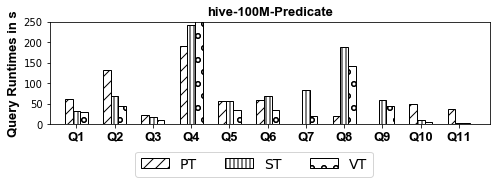

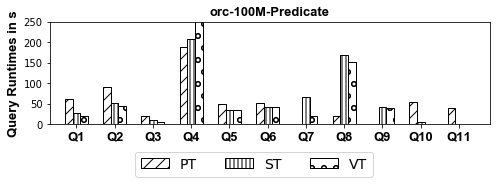

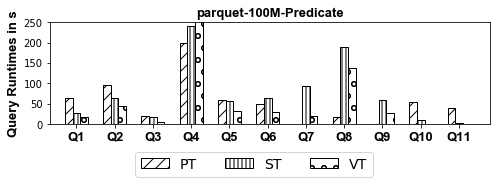

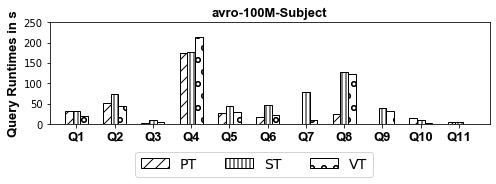

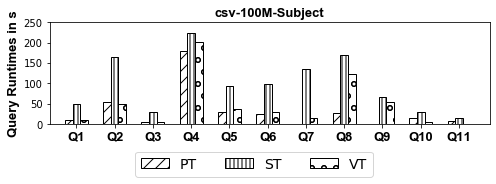

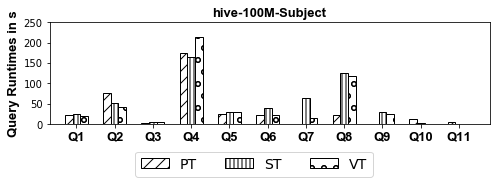

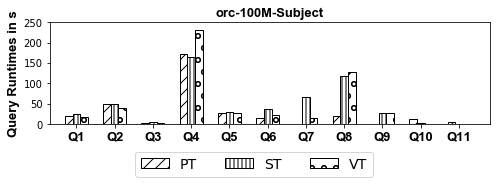

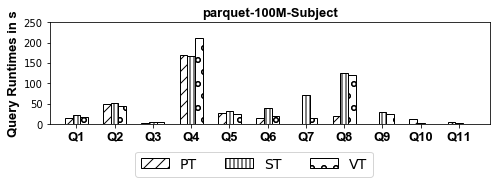

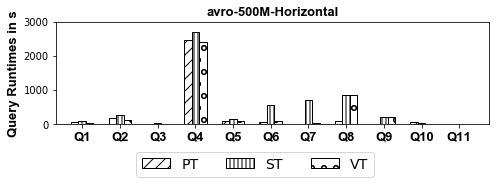

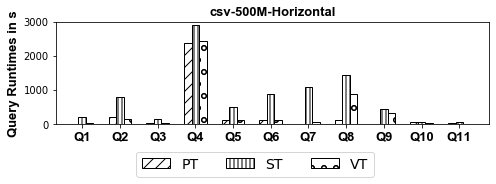

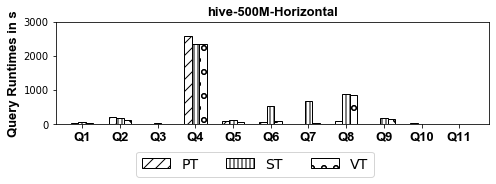

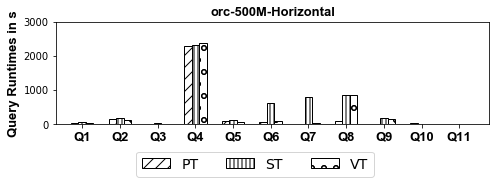

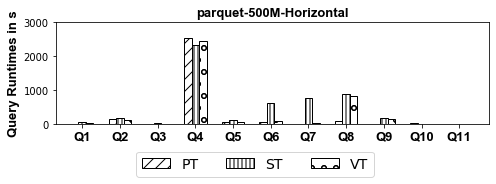

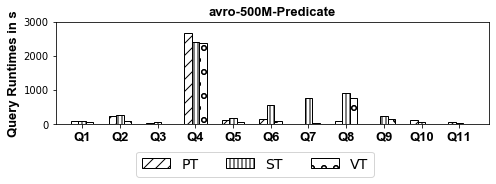

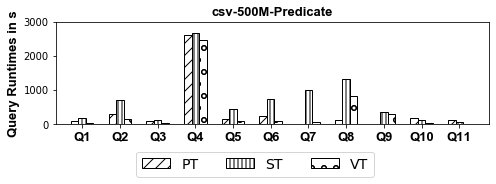

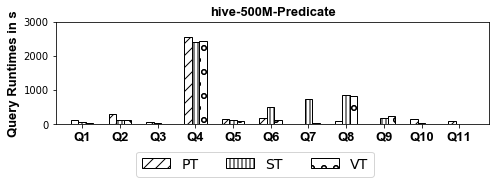

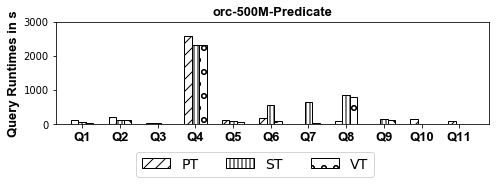

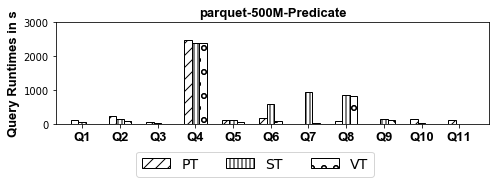

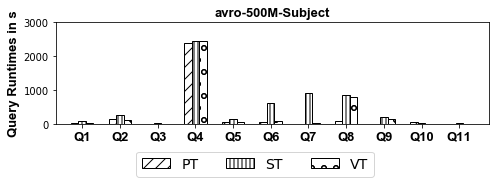

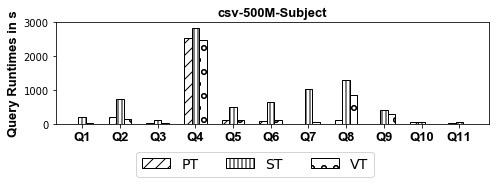

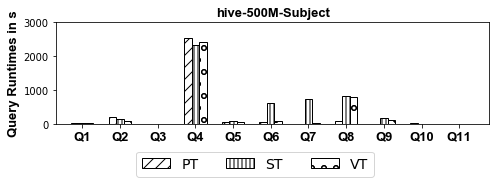

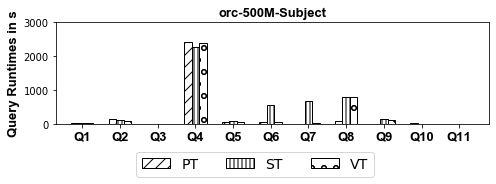

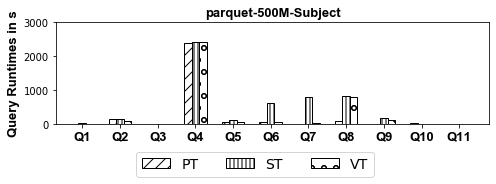

In [64]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

#parent folder of data files
path = 'C:\\Users\\Sadiq\\Desktop\\sp2benchData\\logs'

#define query numbers if there will be grouping, otherwise leave empty
# long_queries = [2, 4, 5, 6, 7, 8, 9]
long_queries = []

#create variables
all_data, long_data, short_data  = ([] for i in range(3))
dirs_list, file_sizes, filenames_list = ([] for i in range(3))
all_missed_queries = []

for filename in os.listdir(path):
    file_sizes.append(filename)

    
def read_files(path, parse = 0):
    
    global schemas, file_formats, length_of_queries
    
    #iterate on given path and read files
    for subdir, dirs, files in os.walk(path):
        
        dirs_list.append(dirs)
        for file in files:
            #full path of the file
            filepath = subdir + os.sep + file
            
            #append to all_data by averaging the values inside the file
            all_data.append(pd.read_csv(filepath, header = None).mean().values.tolist())                        
            
    file_formats = dirs_list[1]
    schemas = dirs_list[2]
    length_of_queries = len(all_data[0])
        
    # parse all data into long and short data frames
    if parse == 1:
        for i in range(len(all_data)):
            long_array = []
            short_array = []
            for j in range(len(all_data[i])):
                if (j+1) in long_queries:
                    long_array.append(all_data[i][j])
                else:
                    short_array.append(all_data[i][j])
            long_data.append(long_array)       
            short_data.append(short_array)         

# get query names
all_labels, long_labels, short_labels = ([] for i in range(3))
def get_labels():    
    
    if not long_queries:                
        for i in range(11):
            all_labels.append("Q" + str(i+1))
        
    else:        
        for i in range(11):
            if i+1 in long_queries:
                long_labels.append("Q" + str(i+1))
            else:
                short_labels.append("Q" + str(i+1))            
        
def make_plot(data, query_labels, query_text):
    
    n_schemas = len(schemas)    
    width = 0.2     # the width of the bars    
    hatches = ['//', '|||', 'o', '\\\\', '.', 'x','O', '^', '*', '-']    
                                                   
    for size in range(len(file_sizes)):
        for f in range(len(file_formats)):            

            fig, ax = plt.subplots(figsize=(7,2.8))
            xs = []                      
            xs.append(np.arange(11))            
            xs.append([x + width for x in xs[0]])
            xs.append([x + width for x in xs[1]])
        
            for s in range(n_schemas):    
                ax.bar(xs[s], data[s+(f*n_schemas)+(n_schemas*len(file_formats)*size)], width, label=schemas[s], hatch=hatches[s], fill=False)

            ax.set_ylabel('Query Runtimes in s', fontname="Arial", fontsize=13, weight='bold')
            ax.set_title(file_formats[f]+'-'+file_sizes[size], fontname="Arial", fontsize=13, weight='bold')        
            ax.set_xticks([r + width for r in range(len(xs[0]))])                                                                                   
            ax.set_xticklabels(query_labels, fontname="Arial", fontsize=13, weight='bold')            
            
            if not long_queries:
                ax.legend(bbox_to_anchor=(0.75, -0.2), ncol=len(file_formats), prop={'size': 14}) 
                fig.tight_layout()
            else:
                ax.legend(bbox_to_anchor=(1.045, -0.1), ncol=len(file_formats), prop={'size': 12}) 
            
            ####ax.legend(loc = 9, ncol=6, prop={'size': 16}) #bbox_to_anchor=(1.11, -0.1) 
            
            #set scale of x and y axis
            if size < 3:
                plt.axis([-0.5, len(query_labels), 0, 250])
            elif size >= 3:
                plt.axis([-0.5, len(query_labels), 0, 3000])
            
            #save and show plots
            plot_path = path.replace('logs', 'plots')
            plt.savefig(plot_path + '\\'+file_sizes[size]+'\\'+file_formats[f]+'-'+file_sizes[size]+' '+ query_text +'.png', bbox_inches='tight')            
            plt.show()
                                                
#plot all query results together
if not long_queries:
    read_files(path)
    get_labels()
    make_plot(all_data, all_labels, 'All queries')        
        
#plot long and short query results separately
else:    
    read_files(path, 1)
    get_labels()
    make_plot(long_data, long_labels, 'Long queries')
    make_plot(short_data, short_labels, 'Short queries')
